In [358]:
import batoid
from copy import copy
from batoid.utils import normalized
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
batoid.datadir = '/home/bregeon/LSST/CCOB/batoid/batoid/data'

In [359]:
fiducial_telescope = batoid.Optic.fromYaml("LSST_CCOB_r.yaml")

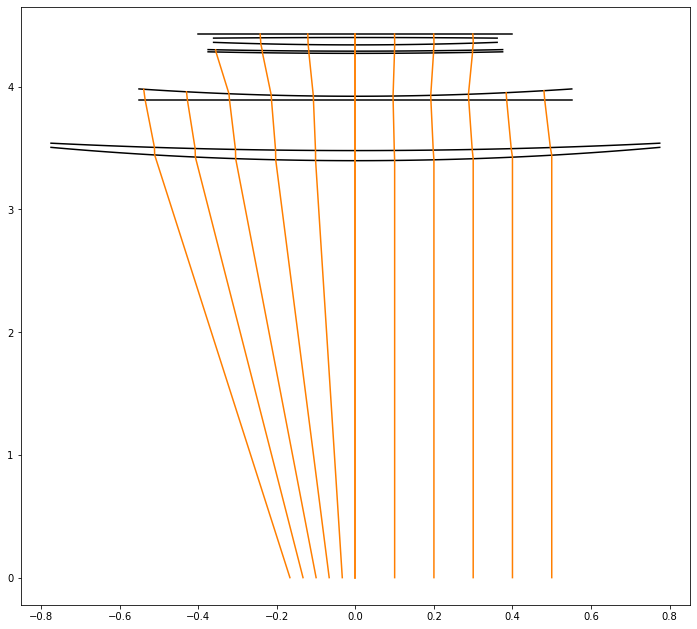

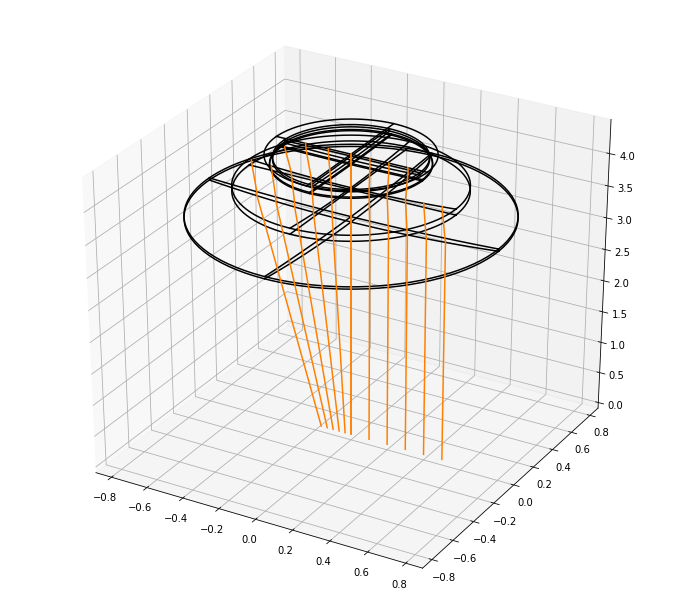

In [360]:
fig1 = plt.figure(figsize=(12, 11))
ax1 = fig1.add_subplot(111)
fiducial_telescope.draw2d(ax1, c='k')
#fiducial_telescope['LSST.LSSTCamera'].draw2d(ax1, c='k')
#ax1.set_xlim(ax1.get_xlim())
#ax1.set_ylim(ax1.get_ylim())

fig2 = plt.figure(figsize=(12, 11))
ax2 = fig2.add_subplot(111, projection='3d')
fiducial_telescope.draw3d(ax2, c='k')
#ax2.set_xlim(ax2.get_xlim())
#ax2.set_ylim(ax2.get_ylim())
#ax2.set_zlim(ax2.get_zlim())

c = '#ff7f00'
rays = []

for dx in range(0, 6, 1):
    p0 = np.array([dx/10., 0, 0])
    v = normalized(np.array([0, 0, 1]))/1.000277
    ray = batoid.Ray(p0, v, t=0, wavelength=500e-9)
    p0 = ray.positionAtTime(0)
    rays.append(batoid.Ray(p0, v, t=0, wavelength=500e-9))

for dvx in range(0, 6, 1):
    p0 = np.array([-dvx/30., 0, 0])
    v = normalized(np.array([-dvx/50, 0., 1]))/1.000277
    ray = batoid.Ray(p0, v, t=0, wavelength=500e-9)
    p0 = ray.positionAtTime(0)
    rays.append(batoid.Ray(p0, v, t=0, wavelength=500e-9))

traceFull = fiducial_telescope.traceFull(batoid.RayVector(rays))
batoid.drawTrace2d(ax1, traceFull, c=c)
batoid.drawTrace3d(ax2, traceFull, c=c)    

In [361]:
rout = traceFull['Detector']['out']
print(rout.coordSys)
for ray in rout:
    print('%.3f\t%.3f'%(ray.x, ray.y))

CoordSys([0,0,4.42942],[[1,0,0],[0,1,0],[0,0,1]])
0.000	0.000
0.100	0.000
0.199	0.000
0.299	0.000
0.399	0.000
0.498	0.000
0.000	0.000
-0.121	0.000
-0.242	0.000
-0.364	0.000
-0.485	0.000
0.000	0.000


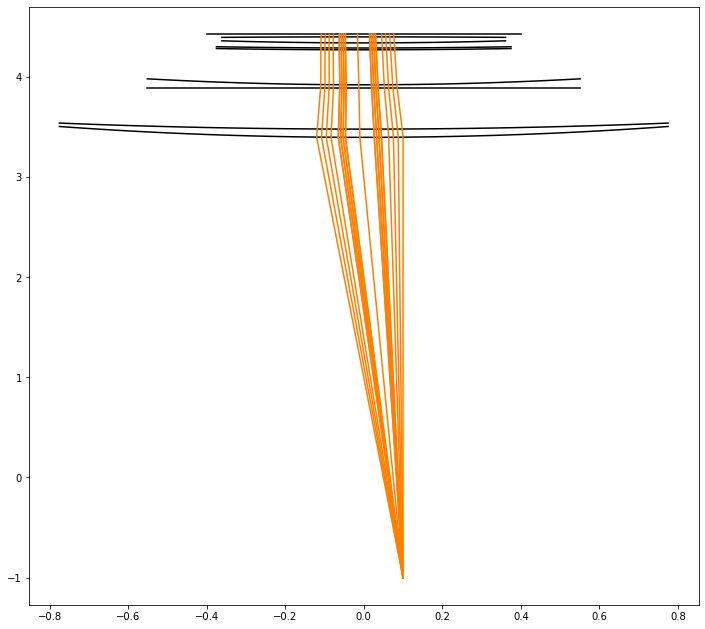

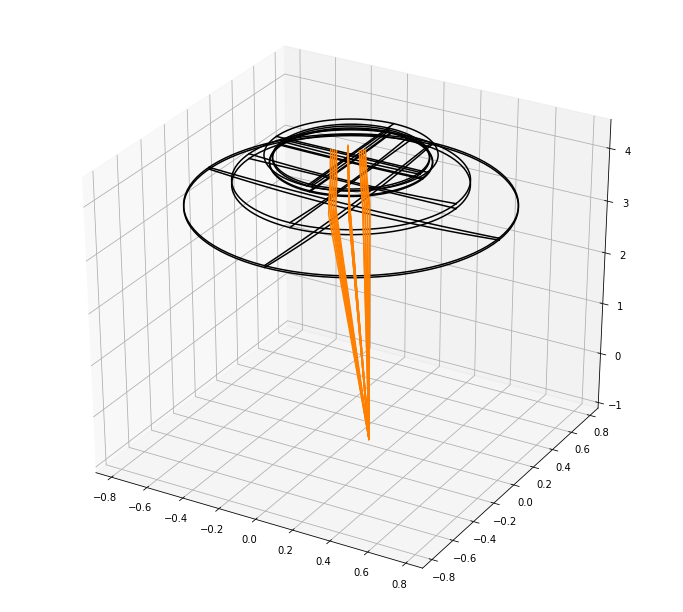

In [362]:
fig1 = plt.figure(figsize=(12, 11))
ax1 = fig1.add_subplot(111)
fiducial_telescope.draw2d(ax1, c='k')
#fiducial_telescope['LSST.LSSTCamera'].draw2d(ax1, c='k')
#ax1.set_xlim(ax1.get_xlim())
#ax1.set_ylim(ax1.get_ylim())

fig2 = plt.figure(figsize=(12, 11))
ax2 = fig2.add_subplot(111, projection='3d')
fiducial_telescope.draw3d(ax2, c='k')
#ax2.set_xlim(ax2.get_xlim())
#ax2.set_ylim(ax2.get_ylim())
#ax2.set_zlim(ax2.get_zlim())

c = '#ff7f00'

# Polar RayVector with similar extent
rays = batoid.RayVector.asPolar(
    optic=fiducial_telescope,
#    backDist=0,
    source = (0.1, 0., -1),
    nrad=10,  # number of radii
    naz=10,  # number of azimuths on outermost ring.
    outer=0.1,  # outer radius.  Default inner radius is 0.0
#    dirCos = (0.01, 0., 1),
#    theta_x=np.deg2rad(0.1),
#    theta_y=np.deg2rad(0.0),
#    nrandom=20,
    wavelength=500e-9
)

traceFull = fiducial_telescope.traceFull(rays)
batoid.drawTrace2d(ax1, traceFull, c=c)
batoid.drawTrace3d(ax2, traceFull, c=c)    


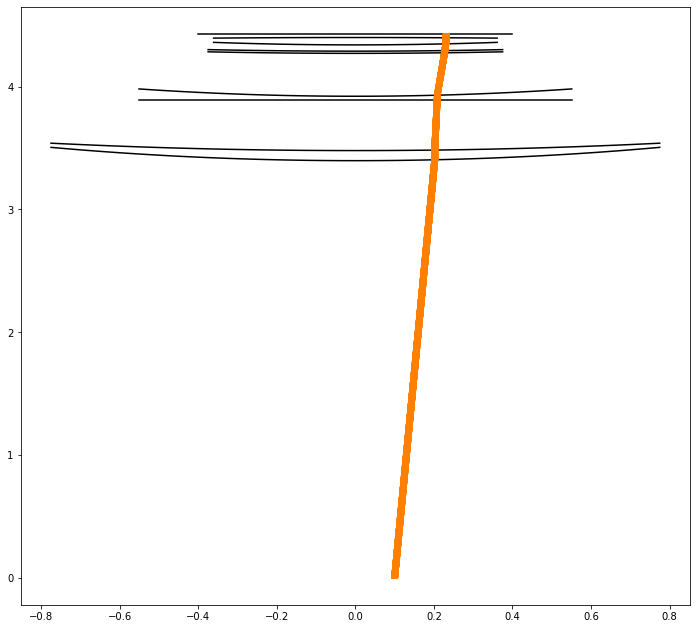

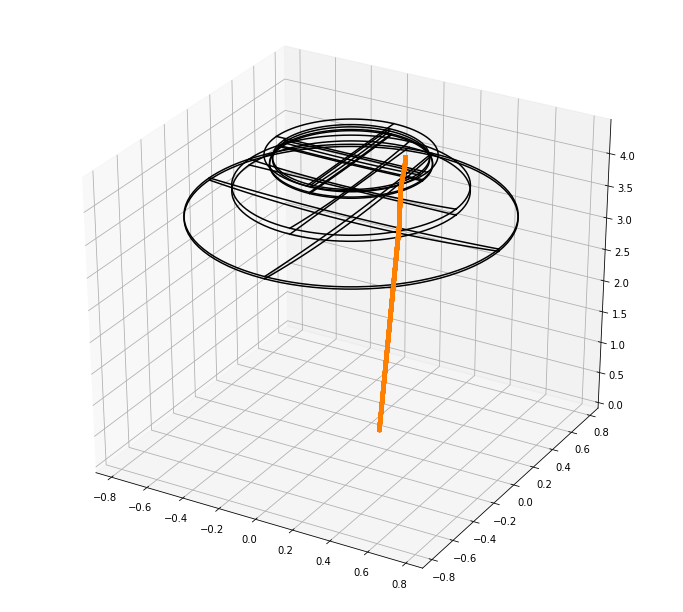

In [363]:
fig1 = plt.figure(figsize=(12, 11))
ax1 = fig1.add_subplot(111)
fiducial_telescope.draw2d(ax1, c='k')

fig2 = plt.figure(figsize=(12, 11))
ax2 = fig2.add_subplot(111, projection='3d')
fiducial_telescope.draw3d(ax2, c='k')

c = '#ff7f00'
rays = []

n = 1000
r = np.random.uniform(low=0, high=0.00005, size=n)  # radius
theta = np.random.uniform(low=0, high=2*np.pi, size=n)  # angle

source_x = np.sqrt(r) * np.cos(theta) + 0.1
source_y = np.sqrt(r) * np.sin(theta) + 0.1

for px, py in zip(source_x, source_y):
    p0 = np.array([px, py, 0])
    v = normalized(np.array([0.03, 0., 1]))/1.000277
    ray = batoid.Ray(p0, v, t=0, wavelength=500e-9)
    p0 = ray.positionAtTime(0)
    rays.append(batoid.Ray(p0, v, t=0, wavelength=500e-9))

traceFull = fiducial_telescope.traceFull(batoid.RayVector(rays))
batoid.drawTrace2d(ax1, traceFull, c=c)
batoid.drawTrace3d(ax2, traceFull, c=c)

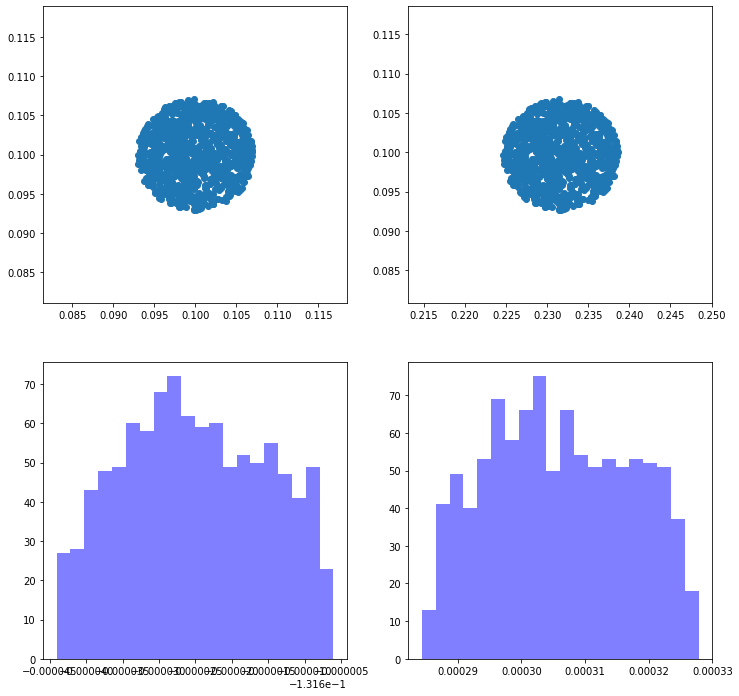

In [364]:
fig3 = plt.figure(figsize=(12, 12))
# plot source spot
ax3 = fig3.add_subplot(221)
plt.scatter(source_x, source_y)

# plot spot on detector
rout = traceFull['Detector']['out']
ax4 = fig3.add_subplot(222)
plt.scatter(rout.x, rout.y)

num_bins = 20
ax5 = fig3.add_subplot(223)
nx, bins_x, patches_x = plt.hist(source_x-rout.x, num_bins, facecolor='blue', alpha=0.5)
ax6 = fig3.add_subplot(224)
ny, bins_y, patches_y = plt.hist(source_y-rout.y, num_bins, facecolor='blue', alpha=0.5)

